In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [5]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\"

#casein session
animal="VGP403"
day="034"
day_meta='034'
date="20230324"



s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# events_file = os.path.join(DATA_FOLDER,
#                            "behav",
#                            "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
#                            .format(animal, day, date))

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='Behavior')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[4] == day_meta: 
        events_file=folder+row[1]

C1 = assemble_data(s2p_folder,events_file,animal="VGP403", diet="NR", solution="Casein")



#Maltodextrin session
animal="VGP403"
day="024"
day_meta='024'
date="20230314"
s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# events_file = os.path.join(DATA_FOLDER,
#                            "behav",
#                            "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
#                            .format(animal, day, date))

for row in rows: 
    if row[0]== animal and row[4] == day_meta: 
        events_file=folder+row[1]



M1 = assemble_data(s2p_folder,events_file,animal="VGP403", diet="NR", solution="Malt")

File is excel file. Making csv metafile first


In [8]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\"

#casein session
animal="VGP403"
day="061"
day_meta='061'
date="20230420"




s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# events_file = os.path.join(DATA_FOLDER,
#                            "behav",
#                            "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
#                            .format(animal, day, date))

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='Behavior')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[4] == day_meta: 
        events_file=folder+row[1]
print(events_file)
C2 = assemble_data(s2p_folder,events_file,animal="VGP403", diet="NRPR", solution="Casein")



#Maltodextrin session
animal="VGP403"
day="066"
day_meta='066'
date="20230425"



s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# events_file = os.path.join(DATA_FOLDER,
#                            "behav",
#                            "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
#                            .format(animal, day, date))

for row in rows: 
    if row[0]== animal and row[4] == day_meta: 
        events_file=folder+row[1]



M2 = assemble_data(s2p_folder,events_file,animal="VGP403", diet="NRPR", solution="Malt")

File is excel file. Making csv metafile first
C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\VGP2\Bonsai\Events2023-04-20T15_40_01.csv


In [170]:
# reponsive cells casein1 

M2['df_responsive']


,responsive,activated,inhibited
pump_all,3,2,1
lick_all,13,11,2
pump_only,0,0,1
lick_only,10,9,2
both,3,2,0
neither,18,20,28


Text(424.175, 0.5, 'Delta F / F')

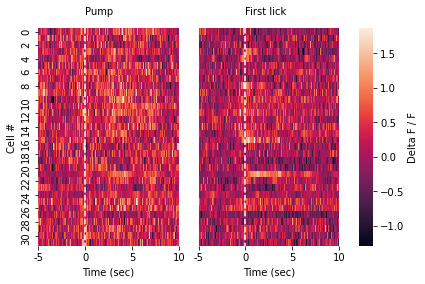

In [9]:
# heatplot to show pump and lick 

f, ax = plt.subplots(ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})

y1 = np.mean(C2["pump_snips_all"], axis=1)
y2 = np.mean(C2["lick_snips_all"], axis=1)

sns.heatmap(y1, ax = ax[0],cbar=False)
sns.heatmap(y2, ax = ax[1], cbar_ax=ax[2])

ax[0].text(50,-2, "Pump")
ax[0].vlines([50],0,77, color="white", linestyle="--")

ax[1].text(50,-2, "First lick")
ax[1].vlines([50],0,77, color="white", linestyle="--")

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])

ax[2].set_ylabel("Delta F / F")

# f.savefig("..//output//vgp403_C1_heatmap_allcells.png")

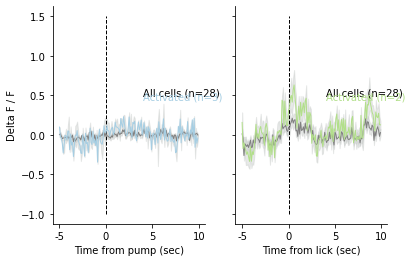

In [188]:
# shaded error plots to show activation Casein 1

f, ax = plt.subplots(ncols=2, sharey=True)

y1 = np.mean(C1["pump_snips_all"], axis=1)
y1_resp = np.mean(C1["pump_snips_all"][np.where(C1["pump_responsive"] == 1)], axis=1)

ax[0].text(90, 0.5, "All cells (n=28)")
ax[0].text(90, 0.45, "Activated (n=3)", color="#a6cee3")

ax[0].vlines([50],-1,1.5, color="black", linestyle="--", linewidth=1)

tp.shadedError(ax[0], y1, linecolor="grey")
tp.shadedError(ax[0], y1_resp, linecolor="#a6cee3")

y2 = np.mean(C1["lick_snips_all"], axis=1)
y2_resp = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)], axis=1)

tp.shadedError(ax[1], y2, linecolor="grey")
tp.shadedError(ax[1], y2_resp, linecolor="#b2df8a")

ax[1].text(90, 0.5, "All cells (n=28)")
ax[1].text(90, 0.45, "Activated (n=2)", color="#b2df8a")

ax[1].vlines([50],-1,1.5, color="black", linestyle="--",linewidth=1)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    
ax[0].set_xlabel("Time from pump (sec)")
ax[1].set_xlabel("Time from lick (sec)")

ax[0].set_ylabel("Delta F / F")
ax[0].set_yticks([-1.0,-0.5, 0, 0.5,1.0,1.5])

f.savefig("..//output//vgp403_casein1.2_shadederror.png")

In [192]:
C1["df_responsive"].activated


pump_all      2
lick_all      7
pump_only     2
lick_only     7
both          0
neither      24
Name: activated, dtype: int64

In [106]:
C1["df_responsive"].activated[2:6]

pump_only     1
lick_only    10
both          0
neither      19
Name: activated, dtype: int64

Text(0.5, 1.0, 'Maltodextrin')

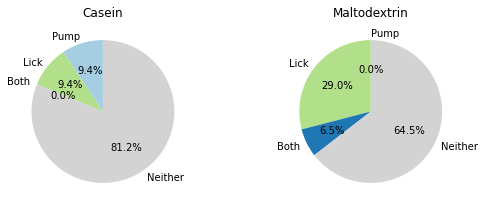

In [10]:
# make pie chart showing activated cells

pie_colors = ['#a6cee3','#b2df8a','#1f78b4','lightgrey']
labels = ['Pump','Lick','Both','Neither']

f, [ax1, ax2] = plt.subplots(figsize=(8,4), ncols=2, gridspec_kw={"wspace":0.5})

ax1.pie(C2["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors)

ax2.pie(M2["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors)

ax1.set_title("Casein")
ax2.set_title("Maltodextrin")

# f.savefig("..//output//vgp403_NRPR_pies_activated.png")

In [62]:
np.shape(C1["pump_snips_all"])
np.shape(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)])

(10, 37, 150)

In [63]:
s = assemble_data(s2p_folder,events_file)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False]
0 16 2 12
1 10 0 19
1 8 0 21


In [64]:
get_number_cells

<function __main__.get_number_cells(s2p_folder)>

In [65]:
s = assemble_data(s2p_folder,events_file)
np.shape(s)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False]
0 16 2 12
1 10 0 19
1 8 0 21


()

In [66]:
s.keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'df_responsive'])

In [196]:
np.shape(s["lick_snips_all"])

(30, 37, 150)

In [197]:
l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]
l.shape

(10, 37, 150)

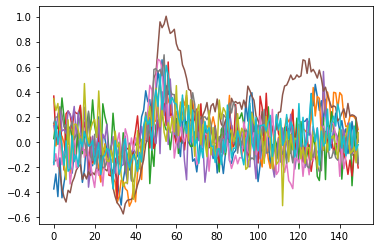

In [198]:
plt.plot(np.mean(l, axis=1).T);

NameError: name 'cas' is not defined

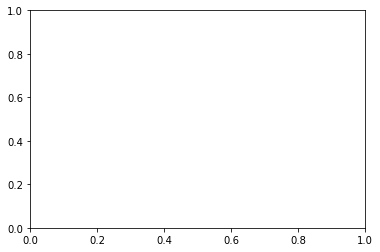

In [70]:
import trompy as tp

f, ax = plt.subplots()

for sol in [cas, malt]:
    s = sol
    l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
    p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]

    y = np.mean(l, axis=1)

    tp.shadedError(ax, y)

NameError: name 'cas' is not defined

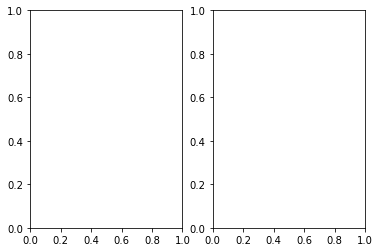

In [71]:
import seaborn as sns

f, ax = plt.subplots(ncols=2)

for sol, axis in zip([cas, malt], ax):
    y = np.mean(sol["lick_snips_all"], axis=1)
    sns.heatmap(y, ax = axis)

In [24]:
# pie chart for activated cells 
sizes_a = [n_pump_a_only, n_lick_a_only, n_both_a, n_non_a]
sizes_i = [n_pump_i_only, n_lick_i_only, n_both_i, n_non_i]
sizes_r = [n_pump_r, n_lick_r, n_both_r, n_non_r]
labels = 'Pump','Lick','Both','Neither'

f1, ax1 = plt.subplots()
ax1.pie(sizes_a, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=['green','red','yellow','dimgrey'])

NameError: name 'n_pump_a_only' is not defined

In [ ]:
def get_ncells_overlap(cond1, cond2):
    
    n_both = sum(np.logical_and(cond1, cond2))
    n_neither = sum(~np.logical_or(cond1, cond2))
    n_cond1 = int(sum(cond1) - n_both)
    n_cond2 = int(sum(cond2) - n_both)

    return (n_cond1, n_cond2, n_both, n_neither)

s = cas

# responsive cells
pump_r = abs(s["pump_responsive"])
lick_r = abs(s["lick_responsive"])

# activated cells
pump_a = s["pump_responsive"] == 1
lick_a = s["lick_responsive"] == 1

# inhibited cells
pump_i = s["pump_responsive"] == -1
lick_i = s["lick_responsive"] == -1

import pandas as pd
return pd.DataFrame([get_ncells_overlap(pump_r, lick_r),
                   get_ncells_overlap(pump_a, lick_a),
                   get_ncells_overlap(pump_i, lick_i)],
                  columns=["pump", "lick", "both", "neither"],
                  index=["responsive", "activated", "inhibited"]).T

pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'


f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)

ax1.pie(get_ncells_overlap(pump_r, lick_r), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax2.pie(get_ncells_overlap(pump_a, lick_a), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax3.pie(get_ncells_overlap(pump_i, lick_i), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);



In [ ]:
df

In [ ]:
f, ax = plt.subplots()

pie_colors = ['green','red','yellow','dimgrey']

pump_r = abs(cas["pump_responsive"])
lick_r = abs(cas["lick_responsive"])
cas_bars = get_ncells_overlap(pump_r, lick_r)

pump_r = abs(malt["pump_responsive"])
lick_r = abs(malt["lick_responsive"])
malt_bars = get_ncells_overlap(pump_r, lick_r)

bottom=[0, 0]
for i, bars_c, bars_m in zip(range(4), cas_bars, malt_bars):
    ax.bar(1, bars_c, bottom=bottom[0], color=pie_colors[i])
    ax.bar(2, bars_m, bottom=bottom[1], color=pie_colors[i])
    
    bottom[0] += bars_c
    bottom[1] += bars_m
    
    print(i, bottom)
    

In [ ]:
pump_a = s["pump_responsive"] == 1
pump_a

In [ ]:
np.logical_or(c3, c4)
~np.logical_or(c1, c2)

In [ ]:
n_non_r + n_both_r + n_lickonly_r + n_pumponly_r

In [ ]:
int(sum(abs(s["lick_responsive"]) * abs(s["pump_responsive"])))


In [ ]:
pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'

sizes_r = [n_pump_r, n_lick_r, n_both_r, n_neither_r]
sizes_a = [n_pump_a, n_lick_a, n_both_a, n_neither_a]
sizes_i = [n_pump_i, n_lick_i, n_both_i, n_neither_i]

f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)
ax1.pie(sizes_r, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);


In [ ]:
np.count_nonzero(s["lick_responsive"] == 1)

In [ ]:
cas = assemble_data(s2p_folder,events_file)
malt = assemble_data(s2p_folder,events_file)

In [ ]:
METAFILE = "..\\data\\"